# Etapa 3: Análise por Série de Fourier

**Objetivo:** Decompor o sinal escolhido (Onda Quadrada) em senos e cossenos usando a Série de Fourier.

**Tarefas:**
* Calcular ou simular a Série de Fourier do sinal escolhido na Etapa 2.
* Determinar a frequência fundamental e identificar as harmônicas dominantes.
* Comentar sobre a convergência da série (quantas harmônicas são suficientes para uma boa reconstrução?).
* Relacionar a análise com a largura de banda necessária para transmitir o sinal mantendo sua forma.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Sinal Original (Onda Quadrada)

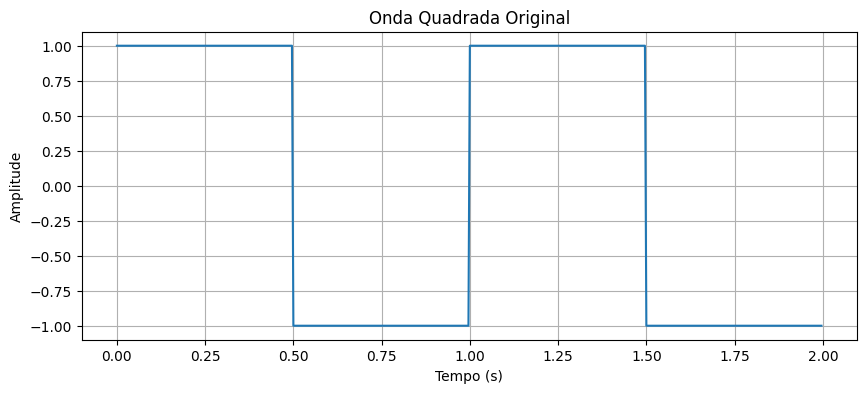

In [6]:
# Parâmetros do sinal (consistente com Etapa 2)
f_fundamental = 1  # Hz
T = 1 / f_fundamental # Período
amplitude = 1
n_ciclos = 2
t = np.linspace(0, n_ciclos * T, 500, endpoint=False) # Vetor de tempo

# Onda Quadrada
onda_quadrada = amplitude * signal.square(2 * np.pi * f_fundamental * t)

plt.figure(figsize=(10, 4))
plt.plot(t, onda_quadrada)
plt.title('Onda Quadrada Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Série de Fourier para a Onda Quadrada

A representação da Série de Fourier para uma onda quadrada com amplitude $A$, período $T$ e frequência fundamental $f_0 = 1/T$, que varia entre $+A$ e $-A$ e é ímpar, pode ser dada por:

$$ x(t) = rac{4A}{pi} sum_{k=1,3,5,...}^{infty} rac{1}{k} sin(2pi k f_0 t) $$

Onde:
- $A$ é a amplitude da onda quadrada.
- $k$ representa os índices das harmônicas (apenas ímpares).
- $f_0$ é a frequência fundamental.

Os coeficientes da série são $b_k = rac{4A}{kpi}$ para $k$ ímpar, e $a_k = 0$ para todo $k$ (incluindo $a_0=0$ pois o valor médio é zero).

### Simulação da Reconstrução do Sinal

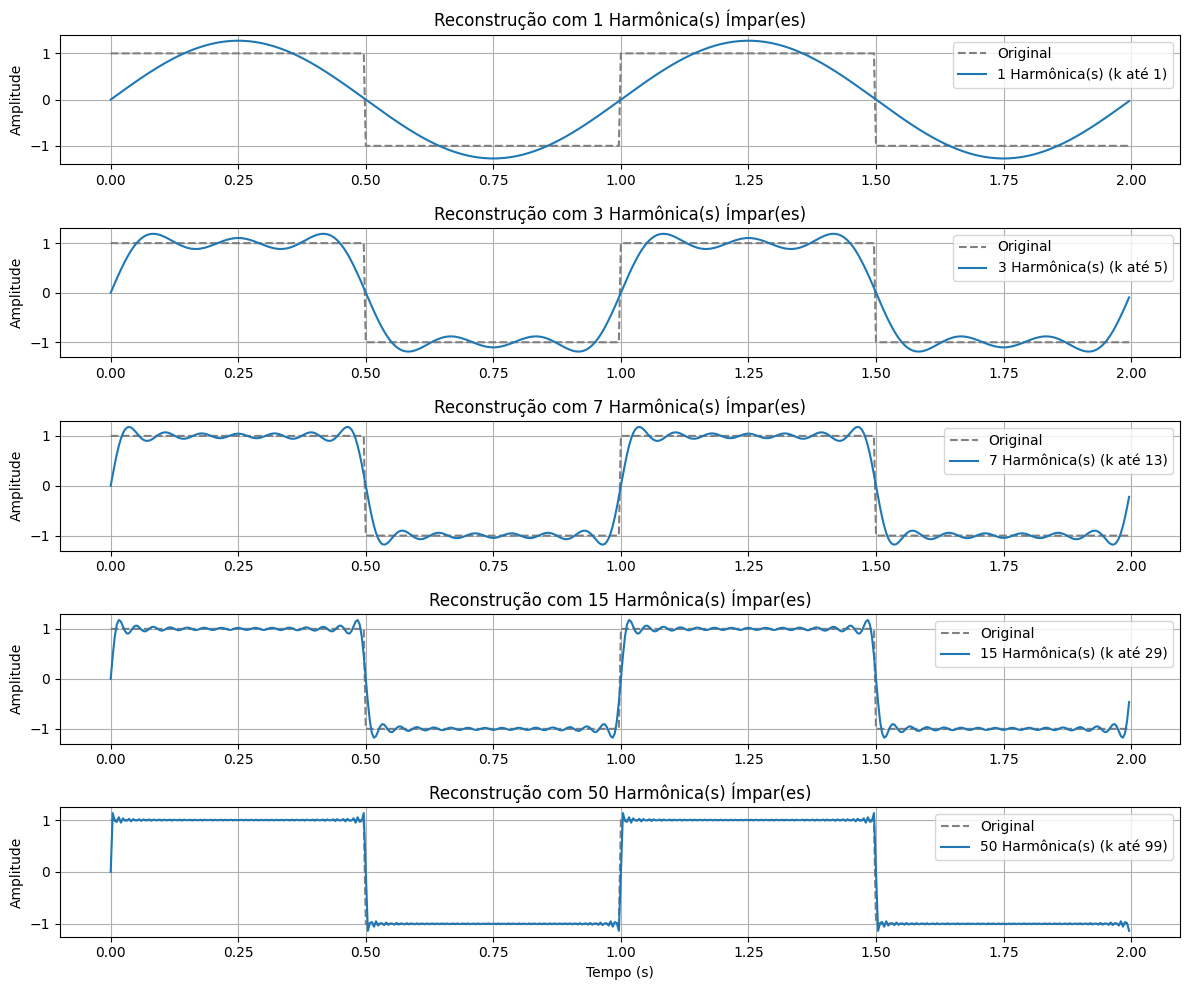

In [7]:
def reconstrucao_onda_quadrada(t_vec, A, T_periodo, num_harmonicas):
    f0 = 1 / T_periodo
    sinal_reconstruido = np.zeros_like(t_vec)
    coeficientes_bk = []
    harmonicas_usadas = []
    
    for k_idx in range(num_harmonicas):
        k = 2 * k_idx + 1  # Apenas harmônicas ímpares: 1, 3, 5, ...
        bk = (4 * A) / (k * np.pi)
        sinal_reconstruido += bk * np.sin(2 * np.pi * k * f0 * t_vec)
        coeficientes_bk.append(bk)
        harmonicas_usadas.append(k)
        
    return sinal_reconstruido, harmonicas_usadas, coeficientes_bk

# Testando a reconstrução com diferentes números de harmônicas
N_harmonicas_test = [1, 3, 7, 15, 50] # Número de termos na série (k=1, k=1,3, k=1,3,5,7 etc)

plt.figure(figsize=(12, 10))

for i, n_h in enumerate(N_harmonicas_test):
    sinal_rec, _, _ = reconstrucao_onda_quadrada(t, amplitude, T, n_h)
    plt.subplot(len(N_harmonicas_test), 1, i + 1)
    plt.plot(t, onda_quadrada, label='Original', linestyle='--', color='gray')
    plt.plot(t, sinal_rec, label=f'{n_h} Harmônica(s) (k até {2*n_h-1})')
    plt.title(f'Reconstrução com {n_h} Harmônica(s) Ímpar(es)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.xlabel('Tempo (s)')
plt.tight_layout()
plt.show()

## Frequência Fundamental e Harmônicas Dominantes

*   **Frequência Fundamental ($f_0$):** Para o sinal gerado, a frequência fundamental é de **1 Hz**.
*   **Harmônicas Dominantes:** Para a onda quadrada, todas as harmônicas são importantes, mas as primeiras harmônicas ímpares (1ª, 3ª, 5ª, ...) são as que têm maior amplitude e, portanto, são as mais dominantes. A amplitude de cada harmônica $k$ (ímpar) é inversamente proporcional a $k$ (ou seja, $b_k = rac{4A}{kpi}$).

In [8]:
# Coeficientes das primeiras harmônicas
num_coeffs_mostrar = 10 # Mostrar os primeiros 10 termos da série (k=1,3,...,19)
_, harmonicas, coeffs = reconstrucao_onda_quadrada(t, amplitude, T, num_coeffs_mostrar)

print(f'Frequência Fundamental (f0): {f_fundamental} Hz')
print('Primeiras Harmônicas e Seus Coeficientes (bk):')
print('-----------------------------------------------')
print(f'| Harmônica (k*f0) | Ordem (k) | Coeficiente (bk) |')
print(f'|------------------|-----------|------------------|')
for i in range(len(harmonicas)):
    freq_harmonica = harmonicas[i] * f_fundamental
    print(f'| {freq_harmonica:^16.2f} Hz | {harmonicas[i]:^9} | {coeffs[i]:^16.4f} |')
print('-----------------------------------------------')

Frequência Fundamental (f0): 1 Hz
Primeiras Harmônicas e Seus Coeficientes (bk):
-----------------------------------------------
| Harmônica (k*f0) | Ordem (k) | Coeficiente (bk) |
|------------------|-----------|------------------|
|       1.00       Hz |     1     |      1.2732      |
|       3.00       Hz |     3     |      0.4244      |
|       5.00       Hz |     5     |      0.2546      |
|       7.00       Hz |     7     |      0.1819      |
|       9.00       Hz |     9     |      0.1415      |
|      11.00       Hz |    11     |      0.1157      |
|      13.00       Hz |    13     |      0.0979      |
|      15.00       Hz |    15     |      0.0849      |
|      17.00       Hz |    17     |      0.0749      |
|      19.00       Hz |    19     |      0.0670      |
-----------------------------------------------


## Convergência da Série

A Série de Fourier para a onda quadrada converge para o sinal original à medida que o número de harmônicas ($N$) aumenta. No entanto, a convergência não é uniforme devido às discontinuidades da onda quadrada. Próximo às discontinuidades, observa-se o **fenômeno de Gibbs**, que se manifesta como um overshoot (ultrapassagem) de aproximadamente 9% da amplitude da descontinuidade, independentemente do número de harmônicas considerado (desde que seja finito).

Visualmente, nos gráficos de reconstrução:
- Com poucas harmônicas (ex: 1 ou 3), a aproximação é grosseira, parecendo mais com uma senoide ou uma combinação simples delas.
- À medida que aumentamos o número de harmônicas (ex: 7, 15, 50), a forma da onda reconstruída se aproxima cada vez mais da onda quadrada original, especialmente nas partes planas.
- Mesmo com muitas harmônicas (ex: 50), o fenômeno de Gibbs ainda é visível perto das transições abruptas.

Para uma "boa" reconstrução, o número de harmônicas necessárias depende da aplicação. Se a fidelidade nas bordas não for crítica, um número menor de harmônicas pode ser suficiente. Se a precisão nas transições for importante, um número muito grande de harmônicas é necessário, mas o fenômeno de Gibbs persistirá.

## Largura de Banda

A análise da Série de Fourier revela que a onda quadrada é composta por uma frequência fundamental e uma série infinita de harmônicas ímpares. Para transmitir ou representar este sinal com fidelidade, teoricamente, seria necessária uma largura de banda infinita para incluir todas as harmônicas.

Na prática, a largura de banda é limitada. A escolha da largura de banda para transmitir um sinal como a onda quadrada envolve um compromisso:
-   **Largura de banda estreita:** Se apenas algumas harmônicas forem consideradas (baixa largura de banda), o sinal reconstruído perderá as características de transições rápidas, tornando-se mais arredondado, similar a uma senoide ou a uma combinação de poucas senoides. As bordas da onda quadrada não serão bem definidas.
-   **Largura de banda larga:** Incluir mais harmônicas (maior largura de banda) permite uma reconstrução mais fiel da forma original da onda quadrada, especialmente suas partes planas e a inclinação das transições. No entanto, como mencionado, mesmo com uma largura de banda muito grande, o fenômeno de Gibbs estará presente nas discontinuidades.

A "largura de banda necessária" depende da aplicação. Para muitas aplicações digitais, é comum considerar harmônicas até a 5ª, 7ª ou mesmo a 9ª para obter uma representação razoável. Se as transições rápidas são cruciais, uma largura de banda maior, englobando mais harmônicas, será necessária. O espectro da onda quadrada mostra que as amplitudes das harmônicas decaem com $1/k$, o que significa que harmônicas de ordem muito alta contribuem cada vez menos para a energia total do sinal, mas são importantes para definir as bordas agudas.